In [ ]:
import pandas as pd

df = pd.read_csv('C:/jhex/jh_ex.py/ex/python_study_group/taxi_train.csv')
df.head()


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [23]:
#뉴욕시 안으로 위도,경도 범위 한정
nyc_min_latitude = 40.63
nyc_max_latitude = 40.85

nyc_min_longitude = -74.05
nyc_max_longitude = -73.75

#위도 경도를 비교해 뉴욕시 범위의 데이터를 df2로 이동
df2 = df.copy(deep=True)
df2['pickup_datetime'] = pd.to_datetime(df2['pickup_datetime'],errors='coerce')
df2[['fare_amount','pickup_longitude','pickup_latitude','dropoff_longitude']] = df2[['fare_amount','pickup_longitude','pickup_latitude','dropoff_longitude']].apply(pd.to_numeric,errors='coerce')#에러값 전부 결측값 처리
#str_data에서 float_data로 변경하고 숫자가 아닌 값 결측값 처리
#df2.isnull().sum()#결측값 dropoff_longitude ,dropoff_latitude컬럼에서 각 5개 씩
df2.dropna(axis=0, inplace=True)#결측값이 있는 행 5개 제거
print(df2.dtypes)

print(df2.shape)

#df2 = df2[([df2['pickup_longitude'] > nyc_min_longitude]) & (df2['pickup_longitude'] < nyc_max_longitude)]#이게 왜 에러
#df2 = df2.drop(df2[([df2['pickup_longitude'] < nyc_min_longitude]) & (df2['pickup_longitude'] > nyc_max_longitude)].index)#2

df2 = df2.drop(df2[df2['pickup_longitude'] < nyc_min_longitude].index)
df2 = df2.drop(df2[df2['pickup_longitude'] > nyc_max_longitude].index)
df2 = df2.drop(df2[df2['dropoff_longitude'] < nyc_min_longitude].index)
df2 = df2.drop(df2[df2['dropoff_longitude'] > nyc_max_longitude].index)

print(df2.shape)
df2 = df2.drop(df2[df2['pickup_latitude'] < nyc_min_latitude].index)
df2 = df2.drop(df2[df2['pickup_latitude'] > nyc_max_latitude].index)
df2 = df2.drop(df2[df2['dropoff_latitude'] < nyc_min_latitude].index)
df2 = df2.drop(df2[df2['dropoff_latitude'] > nyc_max_latitude].index)

print(df2.shape)

key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object
(499994, 8)
(487660, 8)
(483500, 8)


In [24]:
import matplotlib.pyplot as plt

landmarks={'JFK Airport':(-73.78, 40.643),
          'Laguardia Airport':(-73.87, 40.77),
          'Midtown':(-73.98, 40.76),
          'Lower Manhattan':(-74.00, 40,72),
          'Upper Manhattan':(-73.94, 40.82),
          'Brooklyn':(-73.95, 40.66)}

def plot_lat_long(df, landmarks, points='Pickup'):
    plt.figure(figsize=(12,12))
    if points=='Pickup':
        plt.plot(list(df.pickup_longitude),list(df.pickup_latitude),'.', markersize=1)
    else:
        plt.plot(list(df.dropoff_longitude),list(df.dropoff_latitude), '.', markersize =1)
    
    for landmark in landmarks:
        plt.plot(landmarks[landmark][0],landmarks[landmark][1], '*', markersize=15, alpha=1,color='r')#alpha==투명도
        plt.annotate(landmark, (landmarks[landmark][0] + 0.005,
            landmarks[landmark][1] + 0.005), color='r',
            backgroundcolor='w')#plot에 주석달기

    plt.title('{}Locations on NYC Illustrated'.format(points))
    plt.grid(None)
    plt.xlabel('Latitude')
    plt.ylabel('Longtitude')
    plt.show

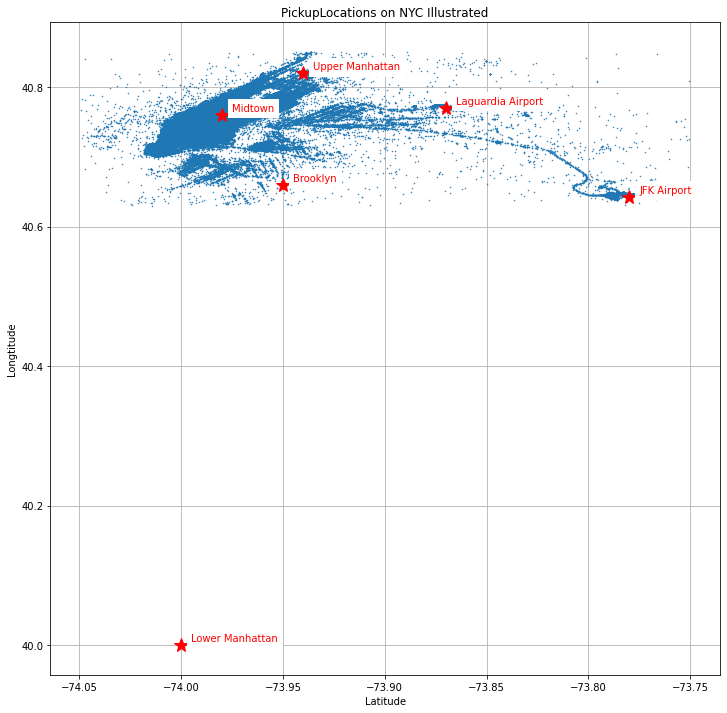

In [25]:
plot_lat_long(df2,landmarks, points='Pickup')

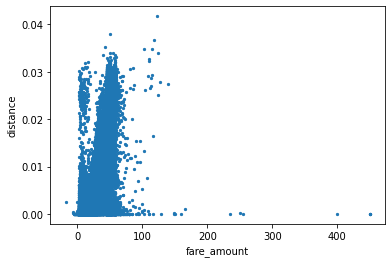

(478571, 9)


In [26]:
def euc_distance(lat1,long1,lat2,long2):
    return(((abs(lat1)-abs(lat2))**2+(abs(long1)-abs(long2))**2)*0.5)

df2['distance'] = euc_distance(df2['pickup_latitude'],
                              df2['pickup_longitude'],
                              df2['dropoff_latitude'],
                              df2['dropoff_longitude'])
df2['distance'] = df2[df2['distance']<0.3]['distance']#?
df2 = df2[df2['distance'] != 0]

plt.scatter(df2['fare_amount'], df2['distance'], s=5)#산점도 그리기
plt.xlabel('fare_amount')
plt.ylabel('distance')
plt.show()
print(df2.shape)


In [27]:
#dataset - pick_datetime : 날짜, 시간
#dataframe2에서 날짜 시간 요일등을 각각 저장
df2['year']=df2['pickup_datetime'].dt.year
df2['month']=df2['pickup_datetime'].dt.month
df2['day']=df2['pickup_datetime'].dt.day
df2['day_of_week']=df2['pickup_datetime'].dt.day_of_week
df2['hour']=df2['pickup_datetime'].dt.hour


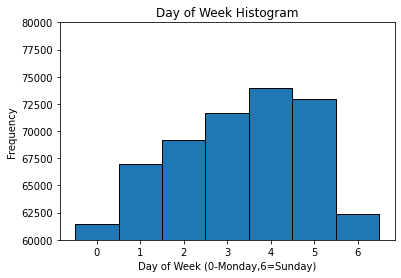

In [28]:
from matplotlib.pyplot import ylim
import numpy as np
#요일별 이용자
df2['day_of_week'].plot.hist(bins=np.arange(8)-0.5, ec='black', ylim=(60000,80000))
#bins= xc축 개수,ec=모서리 색
plt.xlabel('Day of Week (0-Monday,6=Sunday)')
plt.title('Day of Week Histogram')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

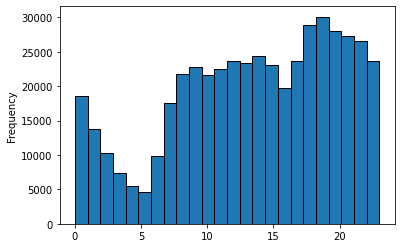

In [29]:
#시간별 이용자
df2['hour'].plot.hist(bins=24, ec = 'black')
plt.show

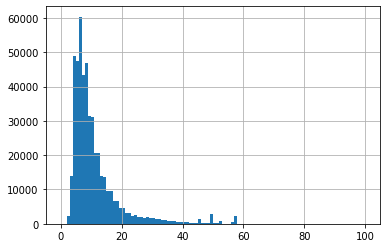

In [30]:
#요금별 사용자
df2 = df2[(df2['fare_amount']>=0) & (df2['fare_amount']<=100)]
#이상치 제거,위치가 여기있어야함
df2['fare_amount'].hist(bins=100)
plt.show()

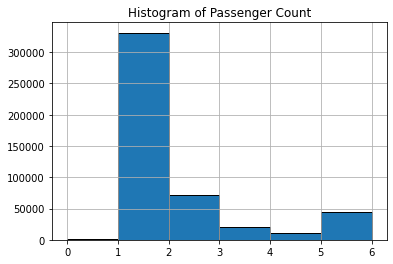

In [31]:
df2['passenger_count'].hist(bins=6,ec='black')
plt.title('Histogram of Passenger Count')
plt.show()

In [52]:
#variable scaling
df_prescaled = df2.copy(deep=True)
df_scaled=df2.drop(['fare_amount','key','pickup_datetime'], axis =1)
cols = df_scaled.columns.to_list()


In [54]:
from sklearn.preprocessing import scale

df_scaled = scale(df_scaled)
df_scaled = pd.DataFrame(df_scaled, columns=cols)
df_scaled = pd.concat([df_scaled,df_prescaled['fare_amount']], axis=1)


In [ ]:
x= df_scaled.loc[:,df_scaled.columns!='fare_amount']
y= df_scaled.loc[:,'fare_amount']

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

model.summary()#모델 구조 요약 출력

In [60]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.fit(x_train,y_train, epochs=5)

Epoch 1/5
12478/12478 [==============================] - 55s 4ms/step - loss: nan - mse: nan
Epoch 2/5
12478/12478 [==============================] - 61s 5ms/step - loss: nan - mse: nan
Epoch 3/5
12478/12478 [==============================] - 77s 6ms/step - loss: nan - mse: nan
Epoch 4/5
12478/12478 [==============================] - 69s 6ms/step - loss: nan - mse: nan
Epoch 5/5
12478/12478 [==============================] - 77s 6ms/step - loss: nan - mse: nan


In [61]:
def predict_random(df_prescaled, x_test, model):
    sample = x_test.sample(n=1, random_state = np.random.randint(low=0, high=10000))
    #sample함수: 랜덤한 위치의 값을 list형태로 출력, n=출력할 개수
    idx=sample.index[0]#샘플의 랜덤으로 지정된 값을 idx로 지정
    actual_fare=df_prescaled.loc[idx, 'fare_amount']#idx값의 index에 있는요소 저장
    day_names = ['Monday', 'Tuseday', 'Wednesday',
               'Thursday', 'Friday', 'Saturday', 'Sunday']
    day_of_week = day_names[df_prescaled.loc[idx, 'day_of_week']]
    #해당 요일을 숫자 형태에서 글자 형태로 변수에 저장
    hour = df_prescaled.loc[idx, 'hour']
    